Student Name: Lavinia Wang<br>
Student ID: 1473704<br>
CSC 578 - 701<br>

# Load and prepare data

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install --user Tensorflow

In [ ]:
!pip3 install --upgrade keras==2.1.3

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import regularizers

# First install CIFAR10 from Keras
from keras.datasets import cifar10

(x_training, y_training), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
# Then split 'training' into two subsets: train and validation.
# After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by stratefied sampling.  
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training,
                                                      stratify=y_training, 
                                                      test_size=0.2)

In [4]:
# Obtain the one-hot-vector representation of target (y).
num_classes = 10

y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_valid_bin = keras.utils.to_categorical(y_valid, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)

# You preprocess the data by doing the following.
* Scale the values of the images (X) to a range of 0 to 1.  Do this for all three sets (x_train, x_valid, x_test).
* Show (any) one image per class from the training set.  Show the (total 10) images in a grid similar to the Tensor tutorial.

In [5]:
# cast the datatype of the image components from an integer to a float, and divide by 255. 
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

In [6]:
class_names = ['airplane','automobile','bird', 'cat','deer','dog','frog','horse','ship','truck']

In [7]:
# create list containing index and image class labels
lst = [[] for i in range(10)]
i = 0
while any(x == [] for x in lst):
    idx = int(y_train[i][0])
    lst[idx] = x_train[i]
    i += 1

/opt/conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


In [8]:
# Helper libraries
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lst[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])

#  Build and train network

### Build a base model with the following configuration.

   * [1st layer] Convolution -- 32 5x5 filters, stride (1,1), activation relu
   * [2nd layer] Max pooling -- size 2x2, stride (2,2)
   * [3rd layer] Convolution -- 32 5x5 filters, stride (1,1), activation relu
   * [4th layer] Max pooling -- size 2x2, stride (2,2)
   * [5th layer] Fully connected (Dense) -- 512 nodes, activation relu
   * [6th layer] Fully connected (Dense) -- 10 nodes, activation softmax
    
Note that you need to flatten the image before the fully connected layer (5th).



In [9]:
x_train.shape

(40000, 32, 32, 3)

### Create a baseline model

In [24]:
baseline_model = keras.Sequential()
# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
# this applies 32 convolution filters of size 5x5 each.
baseline_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
baseline_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
baseline_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
baseline_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
baseline_model.add(Flatten())
baseline_model.add(Dense(512, activation='relu'))
baseline_model.add(Dense(10, activation='softmax'))

Display the network by calling .summary().  It should show:

|Layer (type)                | Output Shape      |       Param # |  
|----------------------------------------------------------------|
|conv2d_1 (Conv2D)           | (None, 28, 28, 32)|        2432   |  
|max_pooling2d_1 (MaxPooling2| (None, 14, 14, 32)|        0      |   
|conv2d_2 (Conv2D)           | (None, 10, 10, 32)|        25632  |   
|MaxPooling2                 | (None, 5, 5, 32)  |         0     |       
|flatten_1 (Flatten)         | (None, 800)       |         0     |   
|dense_1 (Dense)             | (None, 512)       |        410112 |   
|dense_2 (Dense)             | (None, 10)        |        5130   | 

Total params: 443,306 <br>
Trainable params: 443,306 <br>
Non-trainable params: 0

In [11]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total para

* Compile the model.  Use loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] .

In [25]:
baseline_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

* Train the model.
    * Be sure to use the binarized y vectors (y_train_bin and y_valid_bin).
    * Use the valid data (x_valid, y_valid_bin) for the validation_data option.
    * Try 30 epochs or so to start.
    * You may also want to save the history of training for possible later use (to plot graphs to put in the homework documentation, for instance).


In [26]:
baseline_history = baseline_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 6s 140us/step - loss: 1.7294 - acc: 0.3758 - val_loss: 1.4766 - val_acc: 0.4722
Epoch 2/30
40000/40000 [==============================] - 3s 77us/step - loss: 1.3978 - acc: 0.5004 - val_loss: 1.3434 - val_acc: 0.5197
Epoch 3/30
40000/40000 [==============================] - 3s 76us/step - loss: 1.2649 - acc: 0.5504 - val_loss: 1.2218 - val_acc: 0.5669
Epoch 4/30
40000/40000 [==============================] - 3s 76us/step - loss: 1.1655 - acc: 0.5877 - val_loss: 1.1442 - val_acc: 0.6036
Epoch 5/30
40000/40000 [==============================] - 3s 75us/step - loss: 1.0950 - acc: 0.6135 - val_loss: 1.0921 - val_acc: 0.6229
Epoch 6/30
40000/40000 [==============================] - 3s 76us/step - loss: 1.0277 - acc: 0.6393 - val_loss: 1.1355 - val_acc: 0.6067
Epoch 7/30
40000/40000 [==============================] - 3s 77us/step - loss: 0.9752 - acc: 0.6575 - val_loss: 1.0286 - val_ac

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [15]:
test_loss00, test_acc00 = baseline_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc00)

10000/10000 [==============================] - 1s 143us/step
Test accuracy: 0.692


Monitor the training.  Pay attention to overfitting. 

   Try different architectures and/or tweak hyper-parameters to improve training.  Try tweaking CNN parameters rather than general NN parameters such as eta.  Some suggestions:

    * Add more Convolution layers: In the first model you built, there were two Conv layers. You can try adding more Conv layers to the model and see how the result would be changed.
    * Change the number of filters: In the first model, in each layer there were 32 Conv filters. You can try changing the number of filters to either 16 or 64 or other numbers. 
    Also different Conv layers do not necessarily have to have the same number of filters, e.g.  one layer can have 32 and the other layer can have 64 or 128.
    * Change the size of filters: In the first model the filter size was 5*5. You can increase or decrease the size of the filters.  e.g. You can try filter with the size of 3*3 or 7*7.
    * Add more Fully Connected layers: In the first model you used just one FC layer. You can try having two or more FC layers one after another.
    * OR, if you think the network is overfitting, try adding Dropout layers.  Another idea is to add regularization.


### Create model with more conv layers

In [16]:
three_layer_model = keras.Sequential()
# change from 2 cov layers to 3 conv layers
three_layer_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
three_layer_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
three_layer_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
three_layer_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
three_layer_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
three_layer_model.add(Flatten())
three_layer_model.add(Dense(512, activation='relu'))
three_layer_model.add(Dense(10, activation='softmax'))

three_layer_model.summary()

three_layer_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

three_layer_history = three_layer_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss01, test_acc01 = three_layer_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
__________

### Create model with larger number of filters

In [17]:
filter64_model = keras.Sequential()
# change from 32 cov filters to 64 conv filters
filter64_model.add(Conv2D(64, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
filter64_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
filter64_model.add(Conv2D(64, (5, 5), strides = (1,1), activation='relu'))
filter64_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
filter64_model.add(Flatten())
filter64_model.add(Dense(512, activation='relu'))
filter64_model.add(Dense(10, activation='softmax'))

filter64_model.summary()

filter64_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

filter64_history = filter64_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss02, test_acc02 = filter64_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc02)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total para

### Create model with smaller number of filters

In [18]:
filter16_model = keras.Sequential()
# change from 32 cov filters to 16 conv filters
filter16_model.add(Conv2D(16, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
filter16_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
filter16_model.add(Conv2D(16, (5, 5), strides = (1,1), activation='relu'))
filter16_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
filter16_model.add(Flatten())
filter16_model.add(Dense(512, activation='relu'))
filter16_model.add(Dense(10, activation='softmax'))

filter16_model.summary()

filter16_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

filter16_history = filter16_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss03, test_acc03 = filter16_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc03)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 16)        6416      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               205312    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total para

### Create model with different filter numbers on different conv layers

In [19]:
smbg_filter_model = keras.Sequential()
# change from 32 cov filters to 32 conv filters for one layer and 64 for the other
smbg_filter_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
smbg_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
smbg_filter_model.add(Conv2D(64, (5, 5), strides = (1,1), activation='relu'))
smbg_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
smbg_filter_model.add(Flatten())
smbg_filter_model.add(Dense(512, activation='relu'))
smbg_filter_model.add(Dense(10, activation='softmax'))

smbg_filter_model.summary()

smbg_filter_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

smbg_filter_history = smbg_filter_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss04, test_acc04 = smbg_filter_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc04)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total para

In [20]:
bgsm_filter_model = keras.Sequential()
# change from 32 cov filters to 64 conv filters for one layer and 32 for the other
bgsm_filter_model.add(Conv2D(64, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
bgsm_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
bgsm_filter_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
bgsm_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
bgsm_filter_model.add(Flatten())
bgsm_filter_model.add(Dense(512, activation='relu'))
bgsm_filter_model.add(Dense(10, activation='softmax'))

bgsm_filter_model.summary()

bgsm_filter_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

bgsm_filter_history = bgsm_filter_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss05, test_acc05 = bgsm_filter_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc05)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 32)        51232     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total para

### Create model with larger size of filters

In [21]:
bigger_filter_model = keras.Sequential()
# change from 5x5 filters to 9x9 conv filters
bigger_filter_model.add(Conv2D(32, (9, 9), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
bigger_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
bigger_filter_model.add(Conv2D(32, (9, 9), strides = (1,1), activation='relu'))
bigger_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
bigger_filter_model.add(Flatten())
bigger_filter_model.add(Dense(512, activation='relu'))
bigger_filter_model.add(Dense(10, activation='softmax'))

bigger_filter_model.summary()

bigger_filter_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

bigger_filter_history = bigger_filter_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss06, test_acc06 = bigger_filter_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc06)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        7808      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 32)          82976     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total para

### Create model with smaller size of filters

In [22]:
smaller_filter_model = keras.Sequential()
# change from 5x5 filters to 3x3 conv filters
smaller_filter_model.add(Conv2D(32, (3, 3), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
smaller_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
smaller_filter_model.add(Conv2D(32, (3, 3), strides = (1,1), activation='relu'))
smaller_filter_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
smaller_filter_model.add(Flatten())
smaller_filter_model.add(Dense(512, activation='relu'))
smaller_filter_model.add(Dense(10, activation='softmax'))

smaller_filter_model.summary()

smaller_filter_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

smaller_filter_history = smaller_filter_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss07, test_acc07 = smaller_filter_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc07)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               590336    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total para

### Create model with more fc layers

In [23]:
more_fc_model = keras.Sequential()
# change from 1 fc layer to 2 fc layers
more_fc_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
more_fc_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
more_fc_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
more_fc_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
more_fc_model.add(Flatten())
more_fc_model.add(Dense(512, activation='relu'))
more_fc_model.add(Dense(512, activation='relu'))
more_fc_model.add(Dense(10, activation='softmax'))

more_fc_model.summary()

more_fc_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

more_fc_history = more_fc_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss08, test_acc08 = more_fc_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc08)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
__________

### Create model with dropout layers

In [24]:
dropout_model = keras.Sequential()
dropout_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
dropout_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
dropout_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
dropout_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
dropout_model.add(Flatten())
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(10, activation='softmax'))

dropout_model.summary()

dropout_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

dropout_history = dropout_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss09, test_acc09 = dropout_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc09)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               410112    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

### Create model with regularization

In [25]:
l2_model = keras.Sequential()
l2_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu', input_shape=(32, 32, 3)))
l2_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
l2_model.add(Conv2D(32, (5, 5), strides = (1,1), activation='relu'))
l2_model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
l2_model.add(Flatten())
l2_model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001),))
l2_model.add(Dense(10, activation='softmax'))

l2_model.summary()

l2_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

l2_history = l2_model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss10, test_acc10 = l2_model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total para

### Plot the training and validation loss

The solid lines show the training loss, and the dashed lines show the validation loss (remember: a lower validation loss indicates a better model). 

In [22]:
def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

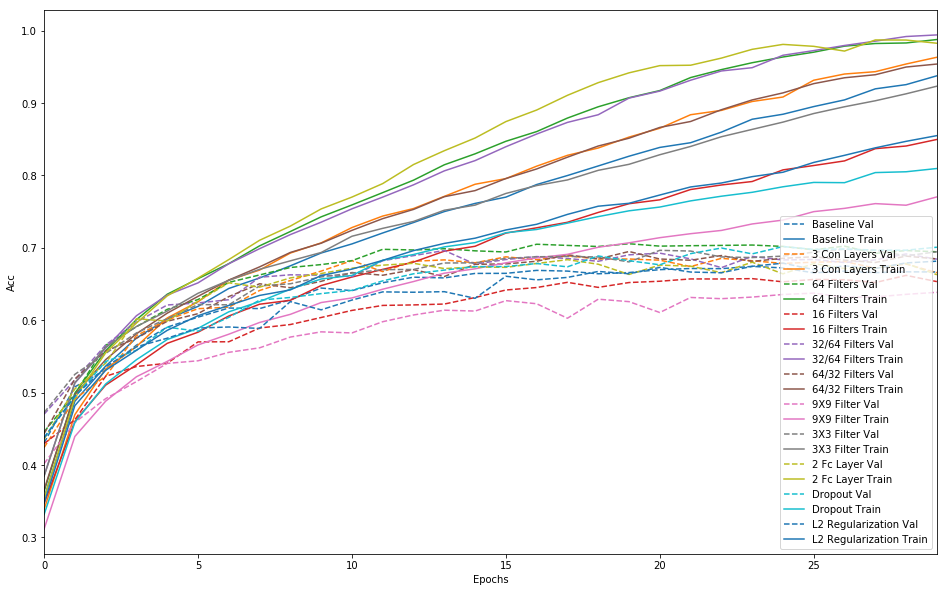

In [26]:
plot_history([('baseline', baseline_history),
              ('3 con layers', three_layer_history),
              ('64 filters', filter64_history),
              ('16 filters', filter16_history),
              ('32/64 filters', smbg_filter_history),
              ('64/32 filters', bgsm_filter_history),
              ('9x9 filter', bigger_filter_history),
              ('3x3 filter', smaller_filter_history),
              ('2 fc layer', more_fc_history),
              ('dropout', dropout_history),
              ('l2 regularization', l2_history)])

Eliminate model whose performance is worse than baseline model.

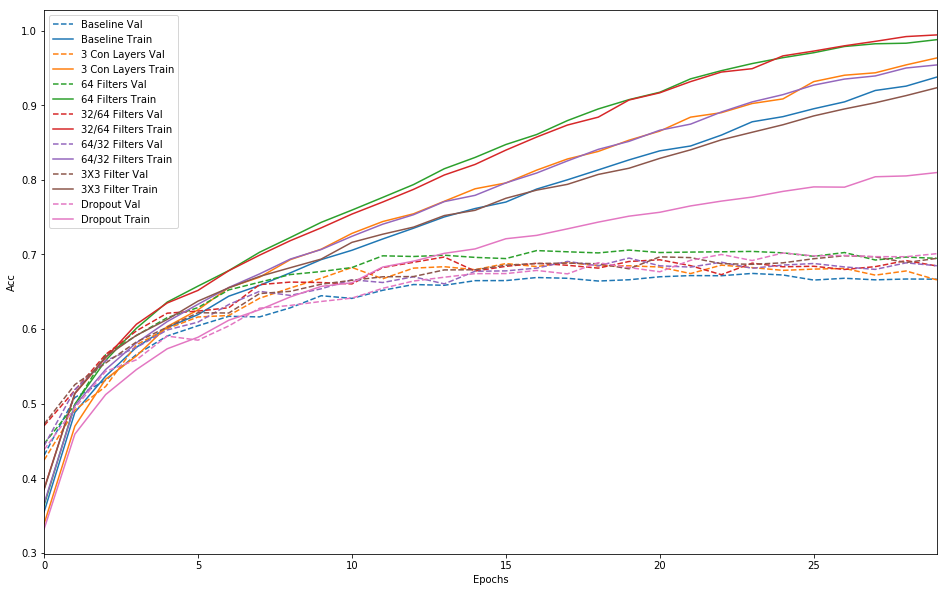

In [29]:
plot_history([('baseline', baseline_history),
              ('3 con layers', three_layer_history),
              ('64 filters', filter64_history),
              ('32/64 filters', smbg_filter_history),
              ('64/32 filters', bgsm_filter_history),
              ('3x3 filter', smaller_filter_history),
              ('dropout', dropout_history)])

### Finialize model
Initial model with 4 conv layers, 32 5x5 filters, zero padding, maxpooling strides = 2, dropout rate = 0.5

In [16]:
model = keras.Sequential()
model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model_history = model.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss11, test_acc11 = model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc11)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

Modify model with 4 conv layers, 32 3x3 filters, zero padding, maxpooling strides = 2, dropout rate = 0.5

In [17]:
model1 = keras.Sequential()
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

model1.summary()

model1.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model1_history = model1.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss12, test_acc12 = model1.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc12)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
__________

Modify model with 4 conv layers, 32 3x3 filters, zero padding, maxpooling strides = 2, dropout = 0.1 before 1st maxpooling, dropout = 0.2 before 2nd maxpooling, dropout rate = 0.5 after fc

In [18]:
model2 = keras.Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(Dropout(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.summary()

model2.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model2_history = model2.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss13, test_acc13 = model2.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc13)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
__________

Modify model with 4 conv layers, 32 3x3 filters, zero padding, maxpooling strides = 2, dropout = 0.2 before 1st maxpooling, dropout = 0.3 before 2nd maxpooling, dropout rate = 0.5 after fc

In [19]:
model3 = keras.Sequential()
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(Dropout(0.2))
model3.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model3.add(Dropout(0.3))
model3.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model3_history = model3.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss14, test_acc14 = model3.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc14)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
__________

Modify model with 4 conv layers, 32 3x3 filters, zero padding, maxpooling strides = 2, dropout = 0.3 before 1st maxpooling, dropout = 0.4 before 2nd maxpooling, dropout rate = 0.5 after fc

In [20]:
model4 = keras.Sequential()
model4.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model4.add(Dropout(0.3))
model4.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model4.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model4.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model4.add(Dropout(0.4))
model4.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

model4.summary()

model4.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'adam', 
                       metrics = ['accuracy'])

model4_history = model4.fit(x_train, y_train_bin, batch_size=400, epochs=30, validation_data=(x_valid, y_valid_bin))

test_loss15, test_acc15 = model4.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc15)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
__________

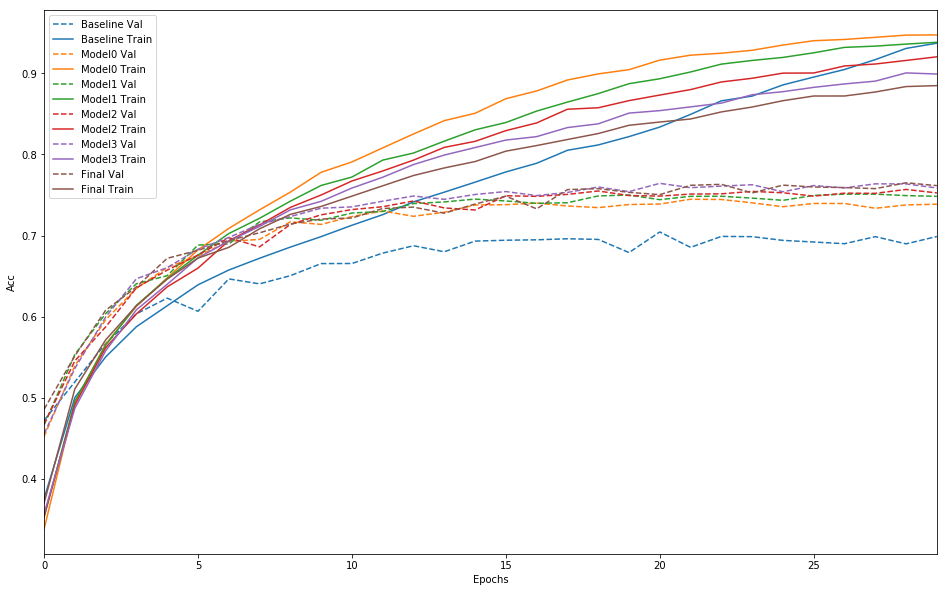

In [27]:
plot_history([('baseline', baseline_history),
              ('model0', model_history),
              ('model1', model1_history),
              ('model2',model2_history),
              ('model3',model3_history),
              ('final', model4_history)])

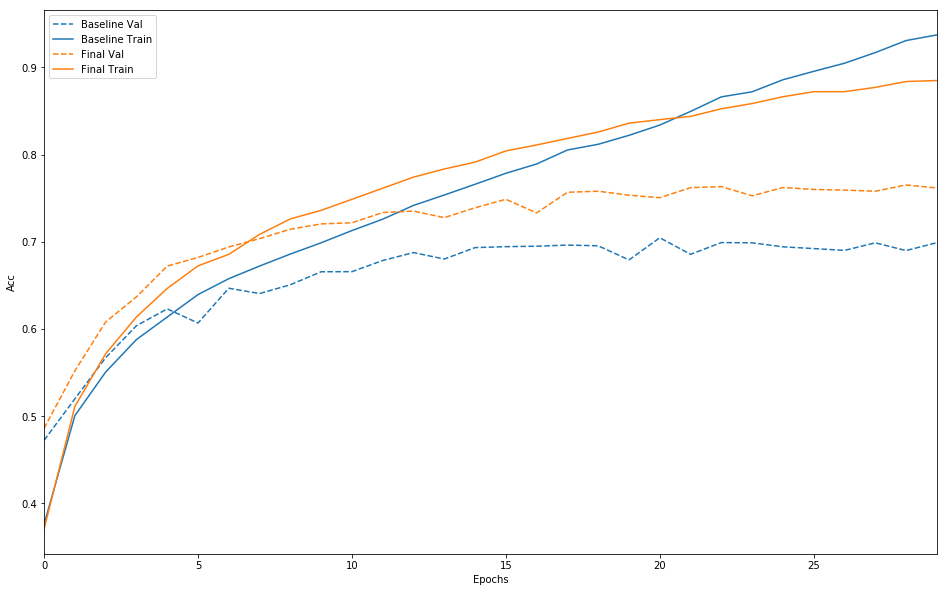

In [28]:
plot_history([('baseline', baseline_history),
              ('final', model4_history)])

# Make predictions
Using the model trained, you make predictions about test images.  Save the predictions (a list) in a variable.

In [ ]:
predictions = model4.predict(x_test)

In [ ]:
predictions.shape

# Write predictions to a Kaggle submission file
Saved predictions is a list of lists, where each inner list is the prediction for a test image.   The list is of size 10, carrying the probability of each target class.  For example,
```python
[[1.3942997e-06 1.3935754e-04 5.6055570e-03 6.6085613e-01 6.7078590e-04
  2.8833924e-02 3.0388865e-01 5.1890177e-09 3.2569944e-06 8.7058385e-07]
 [9.5547803e-05 4.3761898e-02 2.9793470e-12 3.3167865e-12 1.0443895e-13
  1.6440552e-17 4.0106508e-11 6.3863180e-22 9.5614260e-01 9.3374570e-09]
```

For Kaggle submission, you create a (comma-separated) csv file.  You name the file as you wish, but ensure that the extension is .csv.

 The file must have the header on the first row, then the predictions of test images to follow.  The prediction of each image has to start with an ID number.  You can simply traverse the saved prediction list from the beginning and assign an integer sequence from 1 (NOT 0) to 10000 (the size of the test set).
IMPORTANT NOTE: NO space between entries.

|id|    cat0     |     cat1    |    cat2    |     cat3    |    cat4     |    cat5     |   cat6     |    cat7     |     cat8    |     cat9    |
|--|-------------|-------------|------------|-------------|-------------|-------------|------------|-------------|-------------|-------------|
|1 |1.3942997e-06|0.00013935754|0.005605557 |0.6608561    |0.0006707859 |0.028833924  |0.30388865  |5.1890177e-09|3.2569944e-06|8.7058385e-07|
|2 |9.55478e-05  |0.043761898  |2.979347e-12|3.3167865e-12|1.0443895e-13|1.6440552e-17|4.010651e-11|6.386318e-22 |0.9561426    |9.337457e-09 |


In [ ]:
import pandas as pd
df = pd.DataFrame(predictions, columns = ['cat' + str(i) for i in range(10)])
df.insert(0, 'id', range(1,10001))
df.to_csv("model4.csv", index = False)